In [1]:
import rdflib
import matplotlib.pyplot as plt
from collections import defaultdict
from rdflib.namespace import RDF, RDFS, XSD
import datetime
from pathlib import Path


Loaded graph data from C:\Users\belen\Desktop\Université de Lorraine\Second semester\Web_semantics_FinalProject\Web_Semantics_FinalProject\Ontology_building\Final_version_populated_graph.ttl


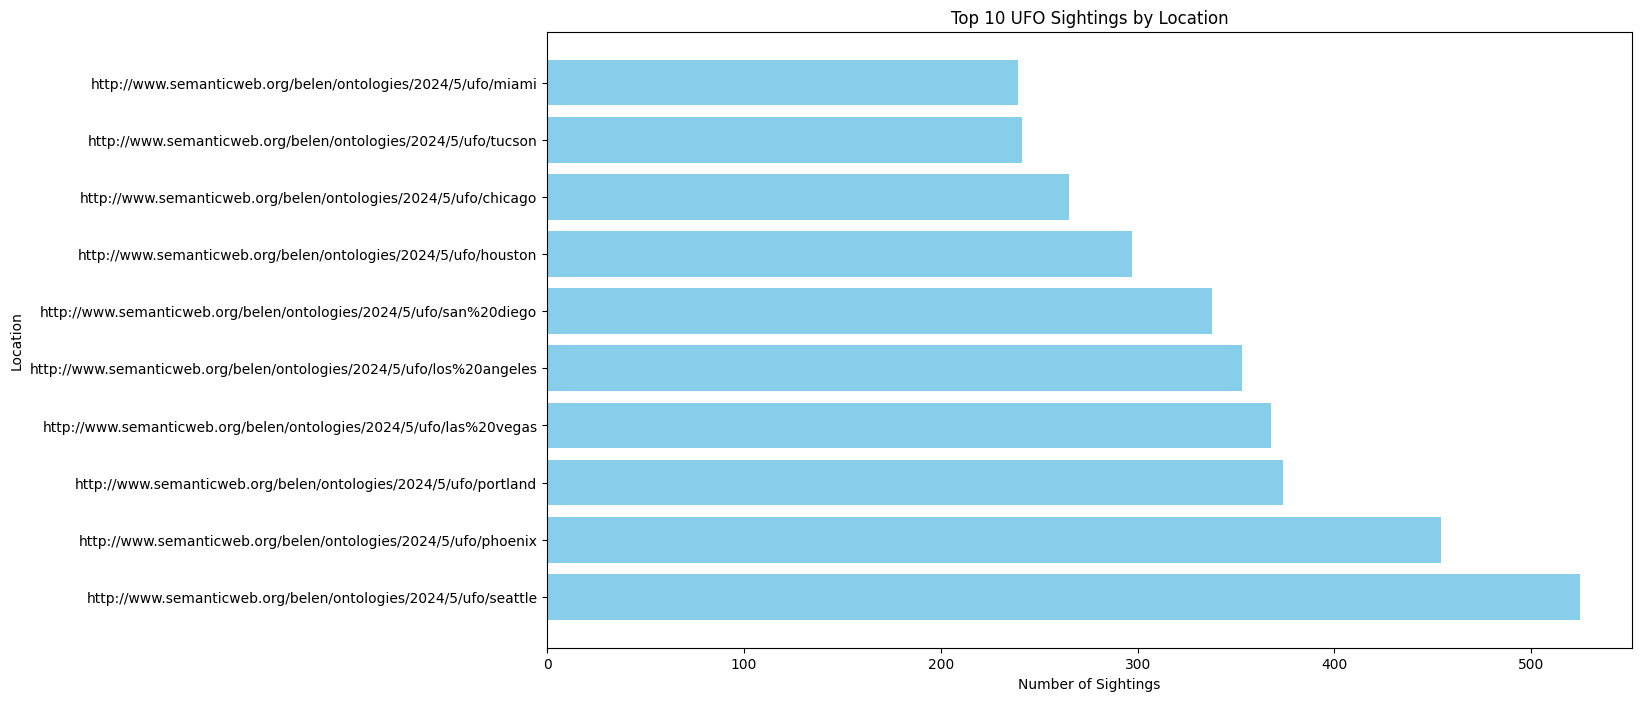

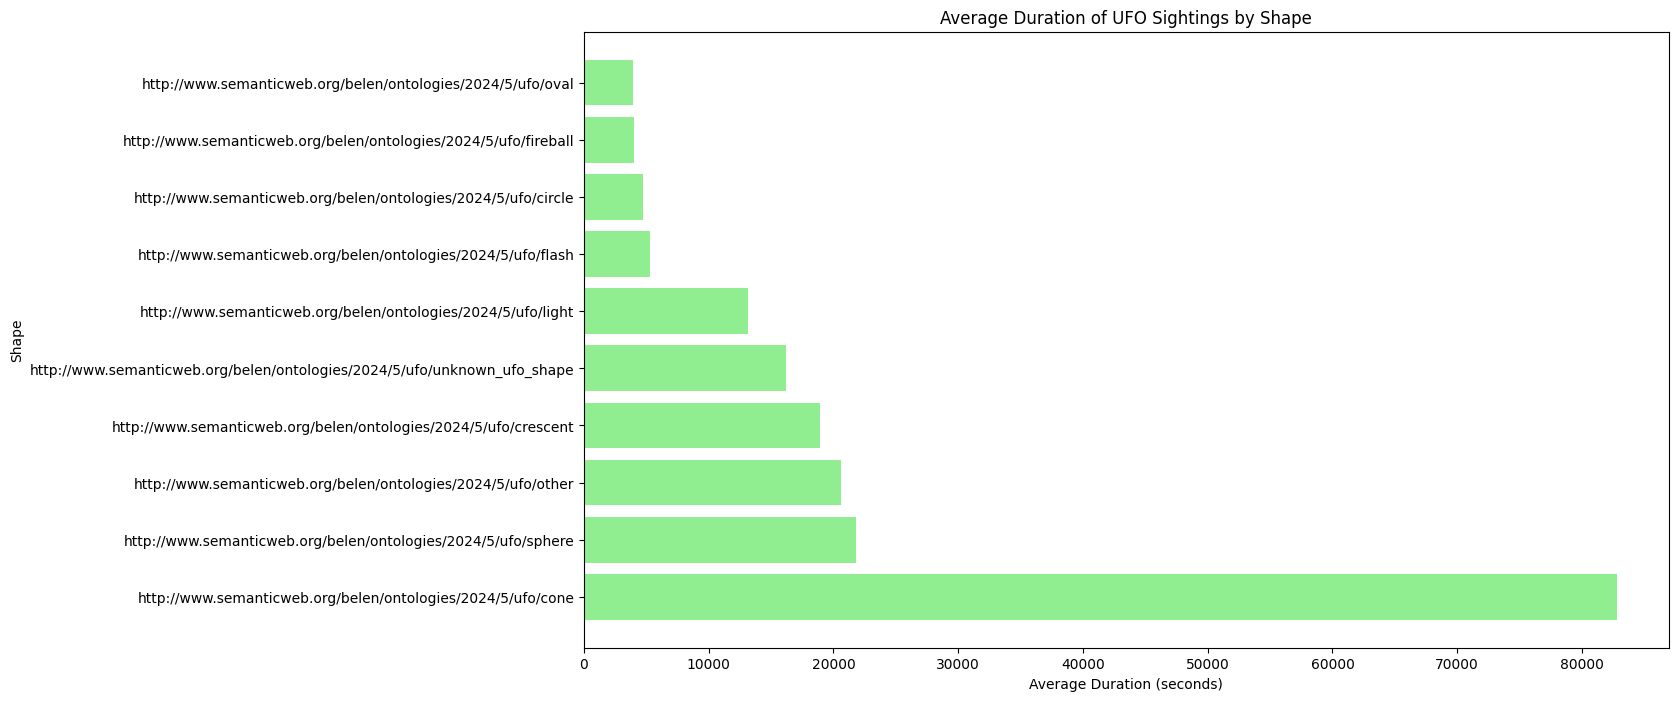

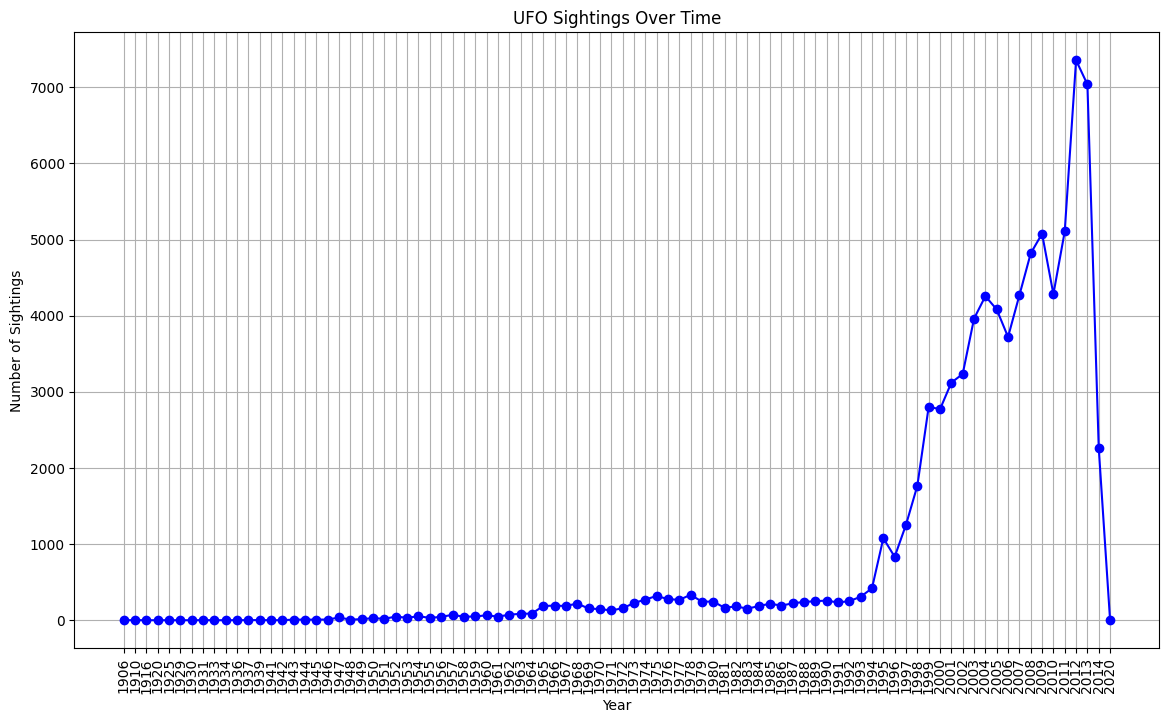

In [30]:
def load_graph(graph_file):
    g = rdflib.Graph()
    try:
        g.parse(graph_file, format=rdflib.util.guess_format(graph_file))
        print(f"Loaded graph data from {graph_file}")
    except Exception as e:
        print(f"Error loading graph data: {e}")
        return None
    return g

def query_graph(g, query):
    try:
        results = g.query(query)
        return results
    except Exception as e:
        print(f"Error executing query: {e}")
        return []

def analyze_sightings_by_cityarea(graph):
    query = """
    PREFIX : <http://www.semanticweb.org/belen/ontologies/2024/5/ufo/>
    SELECT ?location (COUNT(?sighting) AS ?count)
    WHERE {
        ?sighting :seenAt ?location .
        FILTER(BOUND(?location))
    }
    GROUP BY ?location
    ORDER BY DESC(?count)
    LIMIT 10
    """
    results = query_graph(graph, query)
    
    locations = []
    counts = []
    for row in results:
        location = str(row['location'])
        count = int(row['count'].toPython())  # Convert to appropriate type
        locations.append(location)
        counts.append(count)

    if not locations:
        print("No data found for sightings by city area.")
        return

    plt.figure(figsize=(14, 8))
    plt.barh(locations, counts, color='skyblue')
    plt.xlabel('Number of Sightings')
    plt.ylabel('Location')
    plt.title('Top 10 UFO Sightings by Location')
    plt.show()

def analyze_sightings_by_shape_and_duration(graph):
    query = """
    PREFIX : <http://www.semanticweb.org/belen/ontologies/2024/5/ufo/>
    SELECT ?shape (AVG(?duration) AS ?avgDuration)
    WHERE {
        ?sighting :hasShape ?shape ;
                   :hasDuration ?duration .
        FILTER(BOUND(?shape) && BOUND(?duration))
    }
    GROUP BY ?shape
    ORDER BY DESC(?avgDuration)
    LIMIT 10
    """
    results = query_graph(graph, query)
    
    shapes = []
    avg_durations = []
    for row in results:
        shape = str(row['shape'])
        avg_duration = float(row['avgDuration'].toPython())  # Convert to appropriate type
        shapes.append(shape)
        avg_durations.append(avg_duration)

    if not shapes:
        print("No data found for sightings by shape and duration.")
        return

    plt.figure(figsize=(14, 8))
    plt.barh(shapes, avg_durations, color='lightgreen')
    plt.xlabel('Average Duration (seconds)')
    plt.ylabel('Shape')
    plt.title('Average Duration of UFO Sightings by Shape')
    plt.show()

def extract_year_from_date(date):
    return date[:4]

def analyze_temporal_trends(graph):
    query = """
    PREFIX : <http://www.semanticweb.org/belen/ontologies/2024/5/ufo/>
    SELECT ?date
    WHERE {
        ?sighting :seenOn ?date .
        FILTER (BOUND(?date))
    }
    """
    results = query_graph(graph, query)
    
    year_count = defaultdict(int)
    for row in results:
        date_str = str(row['date'])
        year = extract_year_from_date(date_str)
        year_count[year] += 1

    if not year_count:
        print("No data found for temporal trends.")
        return

    years = list(year_count.keys())
    counts = list(year_count.values())

    sorted_years, sorted_counts = zip(*sorted(zip(years, counts)))

    plt.figure(figsize=(14, 8))
    plt.plot(sorted_years, sorted_counts, marker='o', linestyle='-', color='b')
    plt.xlabel('Year')
    plt.ylabel('Number of Sightings')
    plt.title('UFO Sightings Over Time')
    plt.xticks(rotation=90)  # Rotar etiquetas del eje X
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    graph_file = r"C:\Users\belen\Desktop\Université de Lorraine\Second semester\Web_semantics_FinalProject\Web_Semantics_FinalProject\Ontology_building\Final_version_populated_graph.ttl"
    graph = load_graph(graph_file)

    if graph:
        analyze_sightings_by_cityarea(graph)
        analyze_sightings_by_shape_and_duration(graph)
        analyze_temporal_trends(graph)


In [35]:
def load_graph(graph_file):
    # Create a graph
    g = rdflib.Graph()

    # Convert the file path to a URI
    graph_file_uri = Path(graph_file).absolute().as_uri()

    try:
        # Load the data graph
        g.parse(graph_file_uri, format=rdflib.util.guess_format(graph_file))
        print(f"Loaded graph data from {graph_file}")
    except Exception as e:
        print(f"Error loading graph data: {e}")
        return None

    return g

def get_input(prompt, dtype=str):
    while True:
        try:
            value = input(prompt)
            if dtype == datetime.datetime:
                value = datetime.datetime.fromisoformat(value)
            elif dtype == float:
                value = float(value)
            elif dtype == int:
                value = int(value)
            return value
        except ValueError as e:
            print(f"Invalid input: {e}. Please enter a valid {dtype.__name__}.")

def add_triple(g, subject, predicate, obj, obj_dtype=str):
    # Define the namespace
    ns = rdflib.Namespace("http://www.semanticweb.org/belen/ontologies/2024/5/ufo/")

    # Create RDF terms for the triple
    subj = ns[subject]
    pred = ns[predicate]
    if obj_dtype == datetime.datetime:
        obj = rdflib.Literal(obj, datatype=XSD.dateTime)
    elif obj_dtype == float:
        obj = rdflib.Literal(obj, datatype=XSD.float)
    elif obj_dtype == int:
        obj = rdflib.Literal(obj, datatype=XSD.integer)
    else:
        obj = ns[obj]

    # Add the triple to the graph
    g.add((subj, pred, obj))
    print(f"Added triple: ({subj}, {pred}, {obj})")

def query_graph(g, query):
    # Perform a query on the graph
    results = g.query(query)
    return results

def save_graph(g, graph_file):
    # Serialize the graph back to the file
    graph_file_uri = Path(graph_file).absolute().as_uri()
    g.serialize(destination=graph_file_uri, format=rdflib.util.guess_format(graph_file))
    print(f"Graph saved to {graph_file}")

if __name__ == "__main__":
    # File path
    graph_file = r"C:\Users\belen\Desktop\Université de Lorraine\Second semester\Web_semantics_FinalProject\Web_Semantics_FinalProject\Ontology_building\Final_version_populated_graph.ttl"

    # Load graph
    graph = load_graph(graph_file)

    if graph:
        # Get user input for the new triple
        print("Please provide the details for the new triple:")
        subject = get_input("Enter the subject: ")
        predicate = get_input("Enter the predicate: ")
        obj = get_input("Enter the object: ")
        obj_dtype_str = get_input("Enter the object data type (str, float, int, dateTime): ").lower()

        obj_dtype = str
        if obj_dtype_str == 'float':
            obj_dtype = float
        elif obj_dtype_str == 'int':
            obj_dtype = int
        elif obj_dtype_str == 'datetime':
            obj_dtype = datetime.datetime

        # Add the triple
        add_triple(graph, subject, predicate, obj, obj_dtype)

        # Save the updated graph
        save_graph(graph, graph_file)

        # Define a query to check if the triple was added
        sample_query = f"""
        PREFIX : <http://www.semanticweb.org/belen/ontologies/2024/5/ufo/>
        SELECT ?s ?p ?o
        WHERE {{
            ?s :{predicate} ?o .
        }}
        """

        # Execute the query
        results = query_graph(graph, sample_query)

        # Print the results
        for row in results:
            print(f"{row.s} {row.p} {row.o}")



Loaded graph data from C:\Users\belen\Desktop\Université de Lorraine\Second semester\Web_semantics_FinalProject\Web_Semantics_FinalProject\Ontology_building\Final_version_populated_graph.ttl
Please provide the details for the new triple:
Added triple: (http://www.semanticweb.org/belen/ontologies/2024/5/ufo/ufoTest, http://www.semanticweb.org/belen/ontologies/2024/5/ufo/wasPublished, http://www.semanticweb.org/belen/ontologies/2024/5/ufo/ufoMagazine)
Graph saved to C:\Users\belen\Desktop\Université de Lorraine\Second semester\Web_semantics_FinalProject\Web_Semantics_FinalProject\Ontology_building\Final_version_populated_graph.ttl
http://www.semanticweb.org/belen/ontologies/2024/5/ufo/ufoTest None http://www.semanticweb.org/belen/ontologies/2024/5/ufo/ufoMagazine
